# <p style="background-color:LIGHTBLUE;font-family:newtimeroman;font-size:200%;color:BLACK;text-align:center;border-radius:20px 20px;"><b>Lineer Regression Project(CO2 Emissions)</b></p>


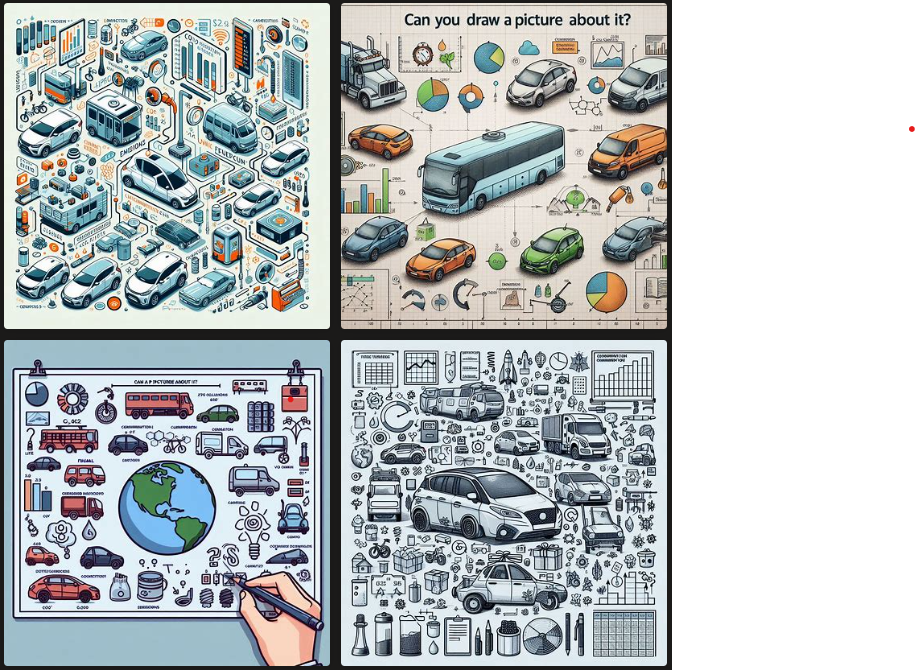

**About Dataset**
- This dataset contains information about various vehicles' carbon dioxide (CO2) emissions and fuel consumption. 
- In the context of Machine Learning (ML), this dataset is often used to predict CO2 emissions based on vehicle characteristics or to analyze fuel efficiency of vehicles. 
- The goal could be to predict CO2 emissions or fuel consumption based on the features of the vehicles.
- There are total 7385 rows and 12 columns. 

**The columns in the dataset can be described as follows:**

1. **Make**: The brand of the vehicle.
2. **Model**: The model of the vehicle.
3. **Vehicle Class**: The class of the vehicle (e.g., compact, SUV).
4. **Engine Size(L)**: The engine size in liters.
5. **Cylinders**: The number of cylinders in the engine.
6. **Transmission**: The type of transmission (e.g., automatic, manual).
7. **Fuel Type**: The type of fuel used (e.g., gasoline, diesel).
8. **Fuel Consumption City (L/100 km)**: Fuel consumption in the city (liters per 100 kilometers).
9. **Fuel Consumption Hwy (L/100 km)**: Highway (out-of-city) fuel consumption.
10. **Fuel Consumption Comb (L/100 km)**: Combined (city and highway) fuel consumption.
11. **Fuel Consumption Comb (mpg)**: Combined fuel consumption in miles per gallon.
12. **CO2 Emissions(g/km)**: CO2 emissions in grams per kilometer.

**Model**

**The "Model" column includes terms that identify specific features or configurations of vehicles:**
- `4WD/4X4`: Four-wheel drive. A drive system where all four wheels receive power.
- `AWD`: All-wheel drive. Similar to 4WD but often with more complex mechanisms for power distribution.
- `FFV`: Flexible-fuel vehicle. Vehicles that can use multiple types of fuel, such as both gasoline and ethanol blends.
- `SWB`: Short wheelbase.
- `LWB`: Long wheelbase.
- `EWB`: Extended wheelbase.

**Transmission**

**The "Transmission" column indicates the type of transmission system in the vehicle:**
- `A`: Automatic. A transmission type that operates without the need for the driver to manually change gears.
- `AM`: Automated manual. A version of a manual transmission that is automated.
- `AS`: Automatic with select shift. An automatic transmission that allows for manual intervention.
- `AV`: Continuously variable. A transmission that uses continuously varying ratios instead of fixed gear ratios.
- `M`: Manual. A transmission type that requires the driver to manually change gears.
- `3 - 10`: Number of gears in the transmission.

**Fuel Type**

**The "Fuel Type" column specifies the type of fuel used by the vehicle:**
- `X`: Regular gasoline.
- `Z`: Premium gasoline.
- `D`: Diesel.
- `E`: Ethanol (E85).
- `N`: Natural gas.

**Vehicle Class**

**The "Vehicle Class" column categorizes vehicles by size and type:**
- `COMPACT`: Smaller-sized vehicles.
- `SUV - SMALL`: Smaller-sized sports utility vehicles.
- `MID-SIZE`: Medium-sized vehicles.
- `TWO-SEATER`: Vehicles with two seats.
- `MINICOMPACT`: Very small-sized vehicles.
- `SUBCOMPACT`: Smaller than compact-sized vehicles.
- `FULL-SIZE`: Larger-sized vehicles.
- `STATION WAGON - SMALL`: Smaller-sized station wagons.
- `SUV - STANDARD`: Standard-sized sports utility vehicles.
- `VAN - CARGO`: Vans designed for cargo.
- `VAN - PASSENGER`: Vans designed for passenger transportation.
- `PICKUP TRUCK - STANDARD`: Standard-sized pickup trucks.
- `MINIVAN`: Smaller-sized vans.
- `SPECIAL PURPOSE VEHICLE`: Vehicles designed for special purposes.
- `STATION WAGON - MID-SIZE`: Mid-sized station wagons.
- `PICKUP TRUCK - SMALL`: Smaller-sized pickup trucks.

This dataset can be used to understand the fuel efficiency and environmental impact of vehicles. Machine learning models can use these features to predict CO2 emissions or perform analyses comparing the fuel consumption of different vehicles.

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [2]:
co2 = pd.read_csv('co2.csv')
df = co2.copy()

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.shape()

In [6]:
df.isnull()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [9]:
#Change columns' name:

renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

# <font color='green'> <b>Simple Linear Regression Model</b><font color='black'>

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [11]:
numeric_df.corr()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


**Lineer Regresyon**

Predicting the dependent variable based on independent variables.

If there is a single independent variable, it is called simple linear regression; if there are multiple independent variables, it is called multiple linear regression.

In simple linear regression, if there is a significant relationship between the feature and the target, then this data is suitable for linear regression.

Fundamental Assumptions of Linear Regression Analysis:
Linear Relationship Assumption: It is assumed that the relationship between the dependent variable and the independent variables can be expressed linearly. In other words, the relationship between the variables and the regression line should be linear. For example, as X increases, Y should also increase or decrease.

Independence Assumption: Observations are assumed to be independent of each other. That is, the result of one observation should not affect the others.

Normality Assumption: The error terms (residuals) should be normally distributed and should not form any pattern. This is necessary for the reliability of the regression model’s predictions.

Independence of Independent Variables: There should be no multicollinearity problem among the independent variables. In other words, the independent variables should not be highly correlated with each other.

The formula for the regression line is
Y^=b0+b1X

-Y^= predicted value

- b0= intercept (the point where the line cuts the y-axis)

- b1= slope = coefficient = weight

- X = independent variable

- Residual = Random error = e= Y-Y^

**The important goal is to minimize the error.**

**Best fit line:** The line that minimizes the errors is drawn. When there is a single feature, it is found using the Ordinary Least Squares method; when there are multiple features, it is found using **gradient descent.**

**Cost - loss function: **The difference between the actual values and the predicted values is squared, and the average error is calculated.

Using the gradient descent optimization algorithm, the task is to gradually adjust the values of 𝑤 and 𝑏 to reduce the cost - loss function and bring it to its minimum value.

It is an iterative algorithm that tries to minimize the error step by step.

**Bias** is the systematic error in a model's predictions. The further the model's predictions are from the actual values, the higher the bias. High bias can occur when the model is too simple and cannot fully capture the complexity of the data, leading to underfitting.

**Variance** refers to how much the model's predictions vary across different data points. When trained on the same dataset multiple times, different results may be obtained. High variance indicates that the model is overly fitted to the data and the patterns it learned cannot be generalized to new data, leading to **overfitting.**

**Bias-variance trade-off:** It is important to strike a balance between bias and variance. Ideally, a model should have both low bias and low variance. This means that the model can accurately capture the complexity of the data and generalize well.

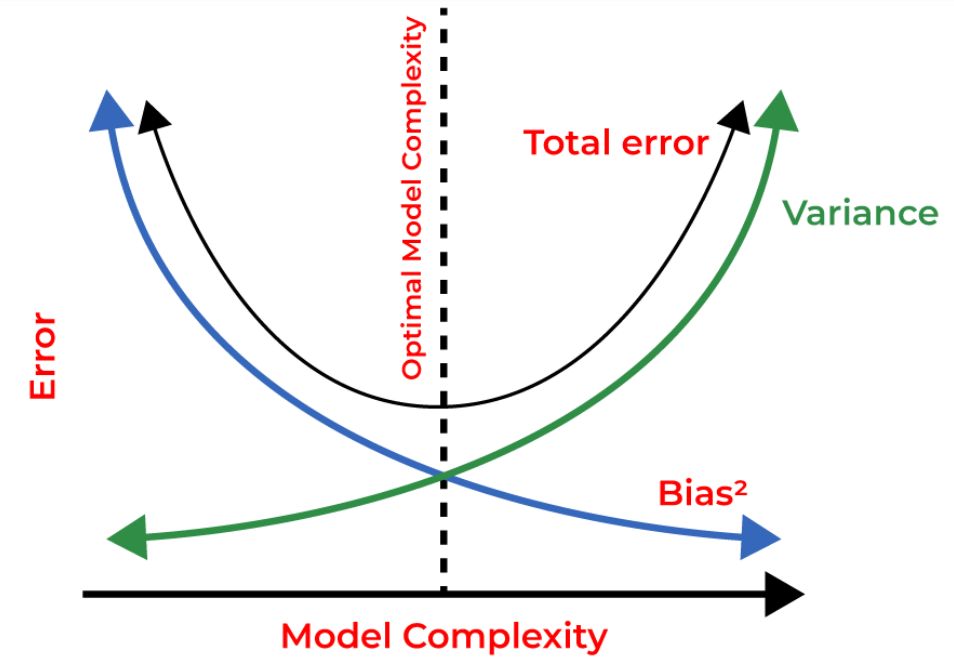
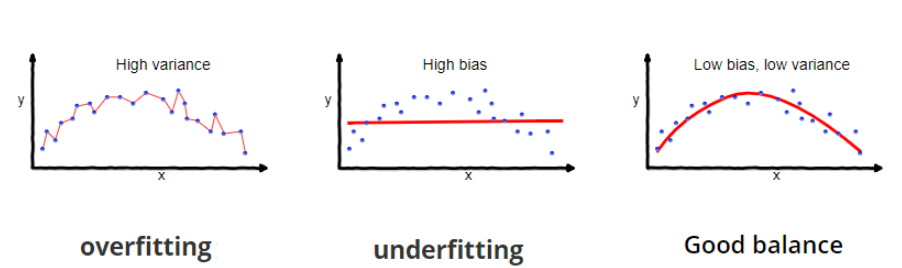

## <font color='blue'> <b>Splitting the dataset into X (independent variables) and y (dependent variable)</b><font color='black'>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X= df[["engine_size"]]
y= df[["co2"]]

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size= 0.2, random_state=0 )

In [15]:
for i in (X_train, X_test, y_train,y_test):
    print(i.shape)

(5908, 1)
(1477, 1)
(5908, 1)
(1477, 1)


## <font color='blue'> <b>Training the Model</b><font color='black'>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
lin_reg.coef_  # b1

array([[36.70483532]])

In [19]:
lin_reg.intercept_ #b0

array([134.57376563])

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [20]:
y_pred_test = lin_reg.predict(X_test)
y_pred_test

array([[244.68827158],
       [207.98343626],
       [274.05213983],
       ...,
       [226.33585392],
       [226.33585392],
       [226.33585392]])

In [21]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train

array([[207.98343626],
       [329.10939281],
       [226.33585392],
       ...,
       [318.09794221],
       [263.04068924],
       [207.98343626]])

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
print("Model testing performance: ")   
eval_metric(y_test, y_pred_test)


Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764517
MAE 		: 23.025089125242353
MSE 		: 912.8346430153155
RMSE 		: 30.213153476843747


In [24]:
print("Model testing performance: ")
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764517
MAE 		: 23.025089125242353
MSE 		: 912.8346430153155
RMSE 		: 30.213153476843747


In [25]:
print("Model training performance")
eval_metric(y_pred_train,y_train)

Model training performance
--------------------------
R2_score 	: 0.6152815823686943
MAE 		: 23.347036830093725
MSE 		: 950.9184766753833
RMSE 		: 30.836966074427348


In [28]:
## The difference between MAE and RMSE indicates outlier effect
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

In [ ]:

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'>

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [ ]:
df.columns

In [ ]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "mpgfuel_cons_comb"]]
y = df["co2"]

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

## <font color='blue'> <b>Training the Model</b><font color='black'>

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

In [ ]:
mlr.coef_
# We will use the coefficients to see the impact of the features on the predictions and for feature selection.
# The order of the coefficients corresponds to the order of the features in the X_train data provided for model training.

In [ ]:
mlr.intercept_

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [ ]:
y_train_pred = mlr.predict(X_train)

In [ ]:
y_pred = mlr.predict(X_test)

In [ ]:
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Gerçek Değerler (y Test)')
plt.ylabel('Tahmin Edilen Değerler (y Pred)')
plt.show()

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [ ]:
avg_em = df ["co2"].mean()
avg_em

In [ ]:
rmse =np. sqrt (mean_squared_error (y_test, y_pred))
rmse

In [ ]:
rmse/avg_em 

In [ ]:
y_pred= mlr.predict (X_test)
y_train_pred =mlr.predict(X_train)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

## 4.5 Cross Validation

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

In [ ]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [ ]:
final_model = LinearRegression()
final_model.fit(X,y)


In [ ]:
final_model.coef_

In [ ]:
final_model.intercept_

In [ ]:
X.loc[[3711,5976]]

In [ ]:
new_data = [[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]
new_data

In [ ]:
final_model.predict(new_data)

In [ ]:
df.loc[[3711,5976]]

# <font color='green'> <b>Regularization</b><font color='black'>

In [ ]:
df_new = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb','co2']]
df_new.head()

In [ ]:
X = df_new[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df_new['co2'] 

## <font color='blue'> <b>Polynomial Conversion</b><font color='black'>

**Polynomial regression**, It is a modeling technique with very limited use. However, it is quite useful for modeling complex and non-linear relationships between variables. For example, it is successfully applied to real-world data in many fields such as physics, economics, and engineering. Additionally, polynomial regression can also be used in academic research and hypothesis testing.

Polynomial regression creates new features by using existing features, adding extra characteristics to the data. This helps the model fit the data better, while also increasing the complexity of the model.

Polynomial regression can be particularly useful when the number of features is small, meaning there are limited features in the data. Therefore, it offers a flexible modeling option depending on the number of features in your dataset.

The degree of the polynomial determines how well the model can capture non-linear relationships. As the degree increases, the model can capture more complex relationships, but this also increases the risk of overfitting. Therefore, carefully selecting the polynomial degree is important for building a successful model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
# We specify the desired degree within the function.
# In linear regression, since the intercept value is our bias, there's no need to add an additional bias.

In [ ]:
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape


In [ ]:
feature_names = polynomial_converter.get_feature_names_out(X.columns)
feature_names 


In [ ]:
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df.head()

In [ ]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.9 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.9 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
poly_df.corr().style.applymap(color_correlation2)

# We use this to highlight values greater than -0.90 or +0.90 in the correlation between features with a desired color.
# The multicollinearity problem arises in gradient descent-based models like linear and logistic regression.
# In datasets with multicollinearity, the scores we obtain will not differ significantly. However, if we are going to perform feature selection,
# we must address this issue. Regularization algorithms not only solve the overfitting problem but also address the multicollinearity issue.

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

## <font color='blue'> <b>Scaling the Data</b><font color='black'>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train) #scaler.fit_transform(X_train) 

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# train setinin mean ve std bilgileri ile test setine scaling işlemi yapıyoruz.

**Why Do We Perform Scaling?**

Standardization: It ensures that features with different scales are brought to a similar range, allowing algorithms to function more effectively.

Distance-Based Algorithms: Algorithms like KNN or K-means, which are based on distance, can be affected by unscaled data when calculating the distance between features. Scaling helps these algorithms provide more fair and consistent results.

Coefficient Comparison: In models like linear regression, scaling is important for comparing the coefficients of the features.

The Most Commonly Used Scaling Algorithms

**StandardScaler (Z-Score Normalization):** Scales each feature so that it has a mean of 0 and a standard deviation of 1.

**MinMaxScaler (Normalization):** Scales all features to a specified range (usually between 0 and 1).

**RobustScaler:** A scaling method that is less affected by outliers. It uses the range between the median and the quartiles.

**Which Scaling Algorithm Should I Use?**

**Standard Practice: ** Typically, StandardScaler and MinMaxScaler are tried first. The algorithm that gives the best results is then chosen.

**Outlier Situation:** If there are outliers in the dataset, RobustScaler may be preferred. However, it's best to try all scaling algorithms and continue with the one that provides the best results.

In summary, scaling ensures that different features are brought to a similar range, enabling machine learning algorithms to work more effectively and accurately. The choice of scaling method depends on the characteristics of the dataset and the type of model. Therefore, it's important to experiment with different scaling methods to determine which one provides the best performance.

# <font color='green'> <b>Ridge Regression</b><font color='black'>

**Why and When Should I Use Ridge-Lasso**

Ridge and Lasso regressions are regularized versions of linear regression. This regularization makes the model more resistant to overfitting and can sometimes improve the overall performance of the model.

**Preventing Overfitting**

**Ridge (L2 Regularization):** Adds the sum of the squared coefficients as a penalty to shrink the coefficients. This reduces the complexity of the model, helping to prevent overfitting.

**Lasso (L1 Regularization):** Adds the sum of the absolute values of the coefficients as a penalty to shrink the coefficients toward zero. This can bring some coefficients down to exactly zero, effectively performing feature selection and reducing model complexity.

**Feature Selection:**

Lasso regression can reduce some coefficients to exactly zero, effectively removing insignificant features from the model. This is known as feature selection and is very useful in high-dimensional datasets.
Multicollinearity:

If there is **high correlation (multicollinearity)** between features in a dataset, this can destabilize the coefficients in linear regression. Ridge and Lasso can stabilize the coefficients in such cases.

**Model Interpretability:**

Lasso can increase the interpretability of the model by including only the most important features. Ridge, by shrinking the coefficients, can also make the influence of features in the model more understandable.
In conclusion, Ridge and Lasso regressions help us overcome some of the limitations of linear regression and allow us to build more generalizable and stable models. The choice between them depends on the dataset, the problem definition, and especially how flexible you want the model to be. To find a balance between these two regularization techniques, approaches like Elastic Net are also available.

**L2 Regularization (Ridge Regularization):**

L2 regularization aims to keep the model weights low, thereby limiting the model’s complexity.

It shrinks coefficients toward zero but never sets any coefficients exactly to zero. It is used when you want to retain all features in the model.

The sum of the residuals is penalized by adding a term that is equal to the regularization parameter (lambda) times the sum of the squared coefficients.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1) #default alpha=1 alpha=regülarizasyon kuvveti

# Alpha is a regularization hyperparameter. As this value increases, the strength of the applied regularization increases.
# To combat overfitting, this hyperparameter should be increased.

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

# In the Ridge regression algorithm, the data we will train on must be scaled. This process allows the model to assign equal weighting to all features, 
# addressing the multicollinearity issue and enabling the model to categorize features as important or unimportant.

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

## <font color='blue'> <b>Choosing best alpha value with GridSearchCV for Ridge</b><font color='black'>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

# The GridSearchCV (GS) algorithm first requires a range for the relevant hyperparameter (HP). To do this, we define the range of values we will provide to GS. 
# We give 100 different values evenly spaced between 0.01 and 1.

In [ ]:
ridge_model = Ridge()


In [ ]:
param_grid = {"alpha":alpha_space}
# Here, the value for alpha corresponds to the alpha_space variable, which is a 100-element array.

In [ ]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', verbose =2, return_train_score=True)

# Since GridSearchCV also performs cross-validation, we set return_train_score=True to obtain the scores for the validation and training sets.
# (The scoring metric specified will return only the score for that metric.)

In [ ]:
grid_ridge.fit(X_train_scaled, y_train)

In [ ]:
grid_ridge.best_params_

In [ ]:
grid_ridge.best_index_

In [ ]:
pd.DataFrame(grid_ridge.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

# The "mean_test_score" and "mean_train_score" are extracted from the best index of the relevant DataFrame and compared to evaluate overfitting and underfitting.

# Since GridSearchCV also performs cross-validation, we do not need to perform additional cross-validation.

# The scores we obtain here are the scores for the scoring metric that we provided to GridSearchCV.

In [ ]:
grid_ridge.best_score_


In [ ]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

# After GridSearchCV, we find the best hyperparameter information for the grid_ridge model.
# It returns the scores based on this hyperparameter. As you can see, grid_ridge can be used like a machine learning algorithm.

In [ ]:
rg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rg_score

# Our scores have further improved with the best alpha value.

In [ ]:
pd.concat([ridge_score, rg_score], axis=1)

In [ ]:
rgm = Ridge(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rgm.coef_

In [ ]:
rgm_df = pd.DataFrame(rgm.coef_,  columns = ["ridge_coef_0.01"])
rgm_df

In [ ]:
pd.concat([rm_df, rgm_df], axis = 1)

# <font color='green'> <b>Lasso Regression</b><font color='black'>

**L1 Regularization (Lasso Regularization):**

This method can also be used for feature selection.

It enables the coefficients to shrink toward zero and sets some coefficients exactly to zero. This reduces insignificant features and simplifies the model.

A penalty equal to the regularization parameter (lambda) (expressed as alpha within the model) times the sum of the absolute values of the coefficients is added to the total of the residuals.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:

lasso_model = Lasso(alpha=1)

# The Lasso model also requires the data to be provided in a scaled format. This process allows the model to assign equal weighting to all features, 
# addressing the multicollinearity issue and enabling us to perform feature selection.

In [ ]:

lasso_model = lasso_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)
ls_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
ls_score

In [ ]:
pd.concat([ridge_score, rg_score, ls_score], axis=1)

In [ ]:
lasso_model.coef_

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([rm_df, rgm_df, lsm_df], axis = 1)

## <font color='blue'> <b>Choosing best alpha value with GridSearchCV for Lasso</b><font color='black'>

In [ ]:
lasso_model = Lasso()
param_grid = {"alpha":alpha_space}

In [ ]:
param_grid = {"alpha":alpha_space}

In [ ]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                          verbose =2, return_train_score=True)

In [ ]:
grid_lasso.fit(X_train_scaled, y_train)

In [ ]:
grid_lasso.best_params_

In [ ]:
grid_lasso.best_index_

In [ ]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

# No Overfiting 

In [ ]:
grid_lasso.best_score_

In [ ]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_


In [ ]:
grid_lasso.best_score_

In [ ]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

# Since grid models do not have a coef_ attribute, we manually reconstruct and train the model based on the best hyperparameter found after grid search to obtain the coefficients.

In [ ]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [ ]:
pd.concat([rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

In [ ]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [ ]:
lg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lg_score

In [ ]:

pd.concat([ridge_score, rg_score, ls_score, lg_score], axis=1)

# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [ ]:
final_model = Lasso(alpha=0.01) #grid_lasso

In [ ]:
final_model.fit(X_scaled, y)

In [ ]:
X.head()

In [ ]:
df.loc[[4]]

In [ ]:
new_data = [[3.5, 12.1, 8.7, 10.6]]
new_data

In [ ]:
poly_sample = polynomial_converter.transform(new_data)
poly_sample

# The number of features in the data used for training the model must be the same as the number of features in the data for which we want to make predictions. 
# For this reason, we transform our new observation into polynomial features of degree 5, just like in our training data.

# Remember that the variable polynomial_converter is an algorithm that performs polynomial feature transformation of degree 5 on our data at the beginning of the notebook. 

In [ ]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

In [ ]:
final_model.predict(scaled_sample)

In [ ]:
(244) - (251.34130607)

In [ ]:
pd.DataFrame(X_train)

# <font color='green'> <b>Feature importances with Ridge</b><font color='black'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# We can rank the features by their importance or perform feature selection using the FeatureImportances function from the Yellowbrick library. 
# We provide the Ridge model with the alpha=0.01 hyperparameter, which gives the best score, into the FeatureImportances function. 
# We also pass the column names of the DataFrame as labels.

# After training our model on the training data, we obtain our visualization using the viz.show() command. 
# Since our model is a Ridge model, we can only group the features as important or unimportant here; we cannot perform feature selection.

# The command visualizer = RadViz(size=(720, 3000)) is used only to adjust the visual size. 
# By changing the numbers 720 and 3000, we can observe changes in the visualization.

# <font color='green'> <b>Feature importances with Lasso</b><font color='black'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# We provide the Lasso model with the alpha=0.01 hyperparameter, which gives the best score, into the FeatureImportances function. 
# We also pass the column names of the DataFrame as labels.

# We can perform feature selection using Lasso.

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

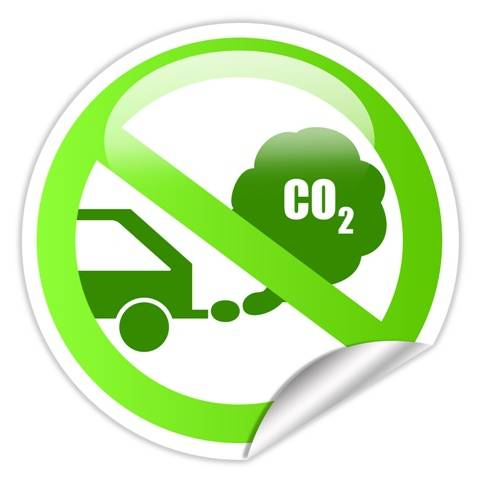